In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

import os,shutil
import os.path
from pathlib import Path
import glob

from PIL import Image
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,\
Bidirectional,LSTM, GlobalAveragePooling2D, Convolution2D,AveragePooling2D,Input, \
GlobalMaxPooling2D,Activation,BatchNormalization
from keras import models
from keras import layers
from keras import Input
from keras import regularizers, optimizers
from keras.models import Model
import tensorflow as tf
from keras.models import load_model
from keras.regularizers import l1,l2,L1L2
from tensorflow.keras import regularizers
np.random.seed(123)

## Business Problem

Our aim is in this project is to image classification about Mars. Images collected by Curiosity Rover which launched Nov. 26, 2011 and landed on Mars at Aug. 5, 2012.  
Curiosity set out to answer the question: Did Mars ever have the right environmental conditions to support small life forms called microbes? We are going to classify images collected by curiosity rover to help future projects.
Our aim to make machine learning model and deploy at the future rovers to make future rover more effective decisions with artificial intelligence depend on mission.

## Business Value

In this project, NASA or any other space companies who work on mars can find image classification model about mars. This could help the business to deploy our machine learning model on the future rovers to make better and better decisions by itself. NASA has two future missions shows on website; first Mars Sample Return, second ExoMars 2022 Rover and Surface Platform. Our model could deploy on that missions.

In [64]:
## Opening label informations.
with open ('Labels Information.txt','r') as rd:
    lst = [str(line) for line in rd]  
lst

FileNotFoundError: [Errno 2] No such file or directory: 'Labels Information.txt'

In [ ]:
ls

In [6]:
# Looking train data.
train_df = pd.read_csv(r'C:\Users\AI\Desktop\mars_image/Train_CSV.csv')
train_df

,JPG,LABELS
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8
...,...,...
3741,calibrated/0163ML0008760050104602D01_DRCL.JPG,10
3742,calibrated/0072MR0005620000103655E01_DRCL.JPG,8
3743,calibrated/0066ML0003650000102517M00_DRCL.JPG,21
3744,calibrated/0157ML0008550020104531I01_DRCL.JPG,8


In [7]:
test_df = pd.read_csv(r'C:\Users\AI\Desktop\mars_image/Test_CSV.csv')
test_df

,JPG,LABELS
0,calibrated/0830MR0036510000500684E01_DRCL.JPG,7
1,calibrated/0640MH0002640000203781I01_DRCL.JPG,24
2,calibrated/0647MH0003250050203806E01_DRCL.JPG,9
3,calibrated/0844MR0037590000501001I01_DRCL.JPG,7
4,calibrated/0618MR0026460020401253I01_DRCL.JPG,11
...,...,...
1300,calibrated/0571MH0002590000201894I01_DRCL.JPG,24
1301,calibrated/0840ML0037090000401385I01_DRCL.JPG,17
1302,calibrated/0868MH0003900000302200I01_DRCL.JPG,10
1303,calibrated/0568MH0002630000201882E01_DRCL.JPG,24


In [8]:
valid_df = pd.read_csv(r'C:\Users\AI\Desktop\mars_image/Validation_CSV.csv')
valid_df

,JPG,LABELS
0,calibrated/0292MH0002810020103587C00_DRCL.JPG,5
1,calibrated/0270MH0002530050102760I01_DRCL.JPG,5
2,calibrated/0549MH0002620000201566E01_DRCL.JPG,24
3,calibrated/0229MR0009720000202913E01_DRCL.JPG,0
4,calibrated/0292MH0002810020103613C00_DRCL.JPG,5
...,...,...
1635,calibrated/0486MR0011580000302944E01_DRCL.JPG,0
1636,calibrated/0506MH0002240020200655I01_DRCL.JPG,8
1637,calibrated/0229MR0010840000202939I01_DRCL.JPG,16
1638,calibrated/0229MR0009760000202918I01_DRCL.JPG,18


In [ ]:
# Looking an example image.
from matplotlib.pyplot import imshow
fpath=r'C:\Users\AI\Desktop\mars_image/images/0003ML0000000110100031E01_DRCL.JPG'
img=plt.imread(fpath)
print (img.shape)
imshow(img)

In [ ]:
train_df['JPG'] = [i.split('/')[1] for i in train_df['JPG']]

## Data Understanding

In [ ]:
cd images

### Understanding Label Classes

####  Alpha Particle X-Ray Spectrometer (APXS)

When it is placed right next to a rock or soil surface, it uses two kinds of radiation to measure the amounts and types of chemical elements that are present.

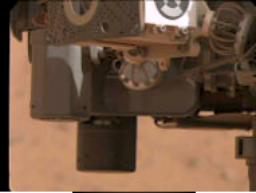

In [88]:
Image.open(r"0032MR0000870010100789I01_DRCL.JPG")

#### Alpha Particle X-Ray Spectrometer Calibration Target

Objects with known properties that act as reference points to help scientists fine-tune observations not only from imagers but also other science instruments

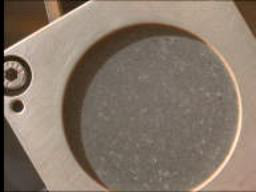

In [87]:
Image.open(r"0179MH0002170010102506I01_DRCL.JPG")

#### Chemcam Calibration target

The Chemistry and Camera tool is known as ChemCam. ChemCam's laser, camera and spectrograph work together to identify the chemical and mineral composition of rocks and soils.

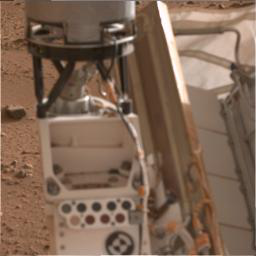

In [86]:
Image.open(r"0050ML0002300250102173E01_DRCL.JPG")

#### Chemin inlet open

The Chemistry and Mineralogy instrument, or CheMin for short, performs chemical analysis of powdered rock samples to identify the types and amounts of different minerals that are present.

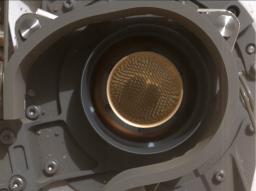

In [85]:
Image.open(r"0036MH0000510030100058E01_DRCL.JPG")

#### Drill

When the rover needs to drill to soil it uses this tool.

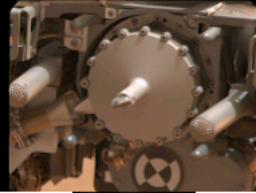

In [84]:
Image.open(r"0173MR0008970000201801I01_DRCL.JPG")

#### Drill holes

Drill holes opened from curiosity rover.

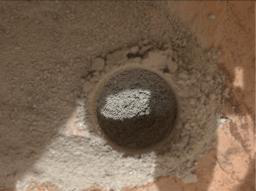

In [65]:
Image.open(r"0180MH0001490020102528C00_DRCL.JPG")

#### Dust Removal Tool(DRT) front

The robot’s Dust Removal Tool (DRT) has brushed a section of the target, prepping it for drilling.

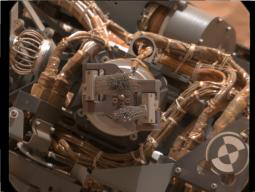

In [66]:
Image.open(r"0150MR0007360000201220E01_DRCL.JPG")

#### Drt side

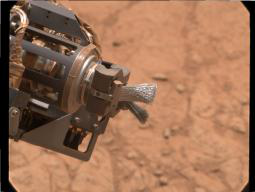

In [67]:
Image.open(r"0150MR0007370000201221E01_DRCL.JPG")

#### Ground

Mars surface ground.

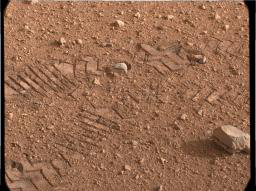

In [68]:
Image.open(r"0017ML0000500200100233B00_DRCL.JPG")

#### Horizon

Instances from mars horizon.

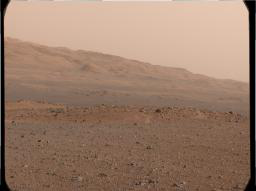

In [69]:
Image.open(r"0017ML0000500030100216C00_DRCL.JPG")

#### Inlet

Instances from inside of the rover.

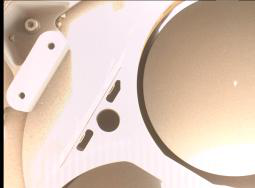

In [70]:
Image.open(r"0093MH0001290030101088E01_DRCL.JPG")

#### Mars Hand Lens Imager(MAHLI)

The Mars Hand Lens Imager, called MAHLI, is the rover's version of the magnifying hand lens that geologists usually carry with them into the field. MAHLI's close-up images reveal the minerals and textures in rock surfaces

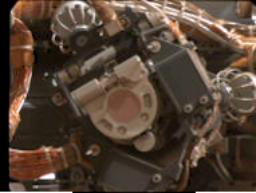

In [71]:
Image.open(r"0032MR0000760020100776I01_DRCL.JPG")

#### MAHLI Calibration Target

The MAHLI calibration target includes color chips, a metric standardized bar graphic, a penny, and a stair-step pattern for depth calibration. The MAHLI adjustable-focus, color camera is one of the tools on the turret at the end of Curiosity's robotic arm. Its calibration target is attached to the rover at the arm's shoulder joint. 

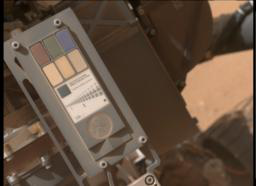

In [72]:
Image.open(r"0034MH0000470030100045E01_DRCL.JPG")

#### MASTCAM

The Mast Camera, or Mastcam for short, takes color images and color video footage of the Martian terrain. The images can be stitched together to create panoramas of the landscape around the rover.

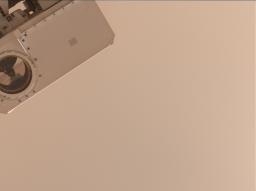

In [73]:
Image.open(r"0177MH0002260000102364C00_DRCL.JPG")

#### MASTCAM Calibration Target

The primary calibration target for Mastcam, a pair of zoomable cameras aboard NASA's Perseverance Mars rover, features color swatches used by scientists to fine-tune the cameras' settings. The object in the center, known as a shadow post, helps scientists check the color of the sky to calibrate for lighting conditions.

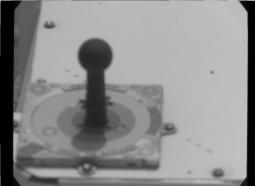

In [74]:
Image.open(r"0013MR0000020060100034D01_DRCL.JPG")

#### Observation tray

This is the small tray at the rover which rover put samples for observation.

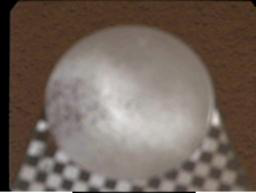

In [75]:
Image.open(r"0078MR0005850080103904I01_DRCL.JPG")

#### Portion Box

It is small boxes at the rover for store.

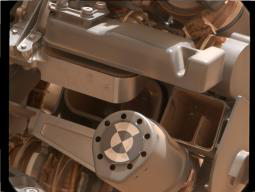

In [76]:
Image.open(r"0173MR0009030000201807E01_DRCL.JPG")

#### Portion tube

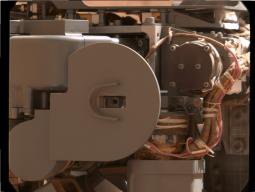

In [77]:
Image.open(r"0073MR0003910010103663E01_DRCL.JPG")

#### Portion tube opening

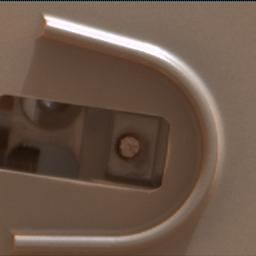

In [78]:
Image.open(r"0173MR0008930000201797C00_DRCL.JPG")

#### Rems uv sensor

The Rover Environmental Monitoring Station is nicknamed REMS, and it contains all the weather instruments needed to provide daily and seasonal reports on meteorological conditions around the rover.

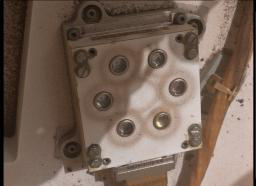

In [79]:
Image.open(r"0154MH0000950010101443C00_DRCL.JPG")

#### Rover rear deck

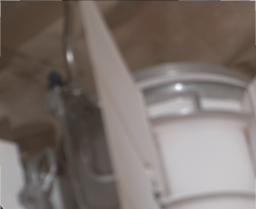

In [80]:
Image.open(r"0044MR0002011450102524E01_DRCL.JPG")

#### Scoop

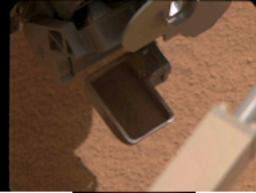

In [81]:
Image.open(r"0069MR0004130000103477I01_DRCL.JPG")

#### Turret

The turret at the end of Curiosity's robotic arm holds five devices. On the left (downhill) edge of the turret in this view is the percussive drill for collecting powdered samples from rock interiors. On the edge toward the camera is a brush device named Dust Removal Tool. Farther to the right is the Mars Hand Lens Imager. Not visible in this view are the Alpha Particle X-ray Spectrometer and a multi-purpose device named Collection and Handling for In-situ Martian Rock Analysis (CHIMRA), which includes a soil scoop and a set of chambers and labyrinths for sieving, sorting and portioning samples of rock powder or soil for delivery to analytical instruments.

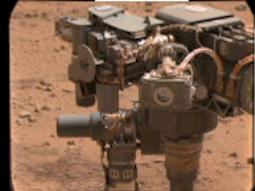

In [82]:
Image.open(r"0065ML0003350000102429I01_DRCL.JPG")

#### Wheel

Examples from wheels of rover.

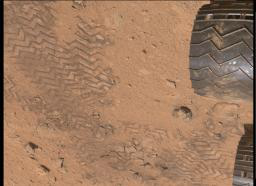

In [83]:
Image.open(r"0085MH0001130000100975E01_DRCL.JPG")

## Data Preparation

In [9]:
#First data cleaning.
sdir=r'C:\Users\AI\Desktop\mars_image/images'

# convet LABELS column values to strings whic are required.
train_df['LABELS']=train_df['LABELS'].apply(lambda x: str(x))
test_df['LABELS']=test_df['LABELS'].apply(lambda x: str(x))
valid_df['LABELS']=valid_df['LABELS'].apply(lambda x: str(x))

# remove 'calibrated' from each of the filenames
train_df['JPG']=train_df['JPG'].apply(lambda x: os.path.split(x)[1])
test_df['JPG']=test_df['JPG'].apply(lambda x: os.path.split(x)[1])
valid_df['JPG']=valid_df['JPG'].apply(lambda x: os.path.split(x)[1])

# for  dataframes make column JPG a full path to the image
train_df['JPG']=train_df['JPG'].apply(lambda x: os.path.join(sdir,x))
test_df['JPG']=test_df['JPG'].apply(lambda x: os.path.join(sdir,x))
valid_df['JPG']=valid_df['JPG'].apply(lambda x: os.path.join(sdir,x))

In [10]:
# Looking labels distribution.
train_df['LABELS'].value_counts(normalize=True)

8     0.625467
9     0.059797
23    0.047517
21    0.044314
10    0.044047
14    0.026962
15    0.022691
17    0.019487
24    0.018420
20    0.015216
3     0.012547
5     0.009610
13    0.009610
12    0.008542
0     0.008009
4     0.005072
16    0.004805
2     0.004004
11    0.003737
19    0.003203
18    0.002136
7     0.002136
1     0.001602
6     0.001068
Name: LABELS, dtype: float64

In [11]:
#Concating all 3 dataframes and splitting to prevent error at the modeling. Because we have missings at the validation dataframe.
df=pd.concat([train_df, valid_df, test_df], axis=0).reset_index(drop=True)
print (df.head())
print (len(df))

                                                 JPG LABELS
0  C:\Users\AI\Desktop\mars_image/images\0077ML00...     15
1  C:\Users\AI\Desktop\mars_image/images\0072MR00...      8
2  C:\Users\AI\Desktop\mars_image/images\0069MR00...     21
3  C:\Users\AI\Desktop\mars_image/images\0154ML00...      8
4  C:\Users\AI\Desktop\mars_image/images\0019MR00...      8
6691


In [12]:
#Splitting.
train_split=.6
valid_split=.2
dummy_split=valid_split/(1-train_split)
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
valid_df, test_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

# make sure each dataframe has all the classes
tr_count=len(list(train_df['LABELS'].unique()))
te_count=len(list(test_df['LABELS'].unique()))
v_count=len(list(valid_df['LABELS'].unique()))
print (' train_df classes: ', tr_count, '  test_df classes: ', te_count, '  valid_df classes: ', v_count)
print (train_df['LABELS'].value_counts())
print(test_df['LABELS'].value_counts())

train_df length:  4014   test_df length:  1339   valid_df length:  1338
 train_df classes:  24   test_df classes:  24   valid_df classes:  24
8     1610
24     609
5      294
9      217
10     179
21     120
23     110
3      107
14      94
7       93
17      86
15      67
12      65
0       56
16      52
13      45
6       44
20      38
19      35
4       29
2       20
1       17
11      16
18      11
Name: LABELS, dtype: int64
8     525
24    205
5     112
9      60
10     54
21     48
23     37
7      34
12     31
3      29
17     27
14     26
16     24
15     22
20     18
19     16
4      16
0      13
6      12
18      9
13      9
1       5
2       4
11      3
Name: LABELS, dtype: int64


In [13]:
#Limiting number of samples per class up to 100 for solution imbalance.
sample_list=[]
max_size= 100
groups=train_df.groupby('LABELS')
for label in train_df['LABELS'].unique():                 
    group=groups.get_group(label)
    sample_count=len(group)    
    if sample_count> max_size:
        samples=group.sample(max_size, replace=False, weights=None, random_state=123, axis=0).reset_index(drop=True)
    else:
        samples=group.sample(frac=1.0, replace=False, random_state=123, axis=0).reset_index(drop=True)        
    
    sample_list.append(samples)
train_df=pd.concat(sample_list, axis=0).reset_index(drop=True)
print (len(train_df))     
print (train_df['LABELS'].value_counts())     
        

1568
24    100
10    100
23    100
8     100
9     100
3     100
5     100
21    100
14     94
7      93
17     86
15     67
12     65
0      56
16     52
13     45
6      44
20     38
19     35
4      29
2      20
1      17
11     16
18     11
Name: LABELS, dtype: int64


In [14]:
#Making directories to save augmented images.
working_dir=r'./'
aug_dir=os.path.join(working_dir, 'aug')
sdir=r'../input/mars-surface-and-curiosity-image-set-nasa/Mars Surface and Curiosity Image/images'
if os.path.isdir(aug_dir):
    shutil.rmtree(aug_dir)
os.mkdir(aug_dir)
for label in train_df['LABELS'].unique():
    dir_path=os.path.join(aug_dir,label)    
    os.mkdir(dir_path)
print(os.listdir(aug_dir))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '23', '24', '3', '4', '5', '6', '7', '8', '9']


In [15]:
#Creaing augmented images and store in aug directories.
target=100
gen=ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, width_shift_range=.2,
                              height_shift_range=.2, zoom_range=.2)
groups=train_df.groupby('LABELS')
for label in train_df['LABELS'].unique():                 
    group=groups.get_group(label)   
    sample_count=len(group)    
    if sample_count< target:
        aug_img_count=0
        delta=target-sample_count
        target_dir=os.path.join(aug_dir, label)      
        aug_gen=gen.flow_from_dataframe( group,  x_col='JPG', y_col=None, target_size=(256,256), class_mode=None, batch_size=1,
                                         shuffle=False, save_to_dir=target_dir, save_prefix='aug-',save_format='jpg')
        while aug_img_count<delta:
            images=next(aug_gen)            
            aug_img_count += len(images) 



Found 93 validated image filenames.
Found 94 validated image filenames.
Found 35 validated image filenames.
Found 86 validated image filenames.
Found 20 validated image filenames.
Found 29 validated image filenames.
Found 11 validated image filenames.
Found 38 validated image filenames.
Found 56 validated image filenames.
Found 52 validated image filenames.
Found 16 validated image filenames.
Found 45 validated image filenames.
Found 67 validated image filenames.
Found 17 validated image filenames.
Found 65 validated image filenames.
Found 44 validated image filenames.


In [16]:
#Creating aug dataframe and concating with train dataframe.
aug_fpaths=[]
aug_labels=[]
classlist=os.listdir(aug_dir)
for klass in classlist:
    classpath=os.path.join(aug_dir, klass)     
    flist=os.listdir(classpath)    
    for f in flist:        
        fpath=os.path.join(classpath,f)         
        aug_fpaths.append(fpath)
        aug_labels.append(klass)
Fseries=pd.Series(aug_fpaths, name='JPG')
Lseries=pd.Series(aug_labels, name='LABELS')
aug_df=pd.concat([Fseries, Lseries], axis=1)
print ('Length of aug_df: ', len(aug_df))
print (aug_df.head())
print()

train_df=pd.concat([train_df,aug_df], axis=0).reset_index(drop=True)
train_df=train_df.sample(frac=1.0, replace=False, random_state=123, axis=0).reset_index(drop=True)

print ('Length of train_df is: ', len(train_df)) 
print (train_df.head())
print (train_df['LABELS'].value_counts())        

Length of aug_df:  832
                           JPG LABELS
0   ./aug\0\aug-_0_2628891.jpg      0
1  ./aug\0\aug-_10_1760835.jpg      0
2  ./aug\0\aug-_11_7256916.jpg      0
3  ./aug\0\aug-_12_3189018.jpg      0
4  ./aug\0\aug-_13_5031126.jpg      0

Length of train_df is:  2400
                                                 JPG LABELS
0  C:\Users\AI\Desktop\mars_image/images\0172MR00...      2
1                        ./aug\2\aug-_15_3119123.jpg      2
2  C:\Users\AI\Desktop\mars_image/images\0076MR00...      8
3                       ./aug\11\aug-_11_1575142.jpg     11
4                       ./aug\20\aug-_22_6010346.jpg     20
24    100
7     100
16    100
1     100
14    100
15    100
17    100
4     100
23    100
18    100
11    100
2     100
3     100
8     100
13    100
9     100
10    100
12    100
20    100
6     100
0     100
21    100
19    100
5     100
Name: LABELS, dtype: int64


In [17]:
#Creating train test and validation sets.
height=256
width=256
channels=3
batch_size=40
img_shape=(height, width, channels)
img_size=(height, width)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):
    #img=img/127.5-1
    return img 
trgen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
sdir=r'../input/mars-surface-and-curiosity-image-set-nasa/Mars Surface and Curiosity Image/images'
train_gen=trgen.flow_from_dataframe( train_df, x_col='JPG', y_col='LABELS', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_gen=tvgen.flow_from_dataframe( test_df, x_col='JPG', y_col='LABELS', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
valid_gen=tvgen.flow_from_dataframe( valid_df, x_col='JPG', y_col='LABELS', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
classes=list(train_gen.class_indices.keys())
class_count=len(classes)
train_steps=int(len(train_gen.labels)/batch_size)
valid_steps = int(len(valid_gen.labels)/batch_size)



test batch size:  13   test steps:  103
Found 2400 validated image filenames belonging to 24 classes.
Found 1339 validated image filenames belonging to 24 classes.
Found 1338 validated image filenames belonging to 24 classes.


In [95]:
#Creating support function for evaluation.
def evaluation(test_gen, preds, print_code, save_dir, subject):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names     
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)         
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)
        
    y_true= np.array(labels)        
    y_pred=np.array(y_pred)
    
    if len(classes)<= 30:
        # create a confusion matrix 
        cm = confusion_matrix(y_true, y_pred )
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4)
    ("Confusion Matrix:\n----------------------\n", cm)
    print("Classification Report:\n----------------------\n", clr)v

In [ ]:
# # lst=[]
# # for i in range(0,25):
# #     lst.append(train_df['JPG'][i])
# for i in train_df['LABELS'].unique():
#     with open(train_df['JPG'][i], 'rb') as file:
#         img = Image.open(file)
#         img.show()

## Modeling


### First Model

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='sigmoid'))
model.compile(loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

In [19]:
history = model.fit(train_gen, 
                              steps_per_epoch=20, 
                              epochs=30, 
                              validation_data=valid_gen, 
                              validation_steps=20)

Epoch 1/30
20/20 [==============================] - 82s 4s/step - loss: 9.4837 - accuracy: 0.0800 - val_loss: 0.6480 - val_accuracy: 0.1150
Epoch 2/30
20/20 [==============================] - 79s 4s/step - loss: 0.2556 - accuracy: 0.1075 - val_loss: 0.5319 - val_accuracy: 0.1850
Epoch 3/30
20/20 [==============================] - 78s 4s/step - loss: 0.8552 - accuracy: 0.1138 - val_loss: 0.5765 - val_accuracy: 0.1400
Epoch 4/30
20/20 [==============================] - 81s 4s/step - loss: 0.8278 - accuracy: 0.1513 - val_loss: 0.5523 - val_accuracy: 0.1275
Epoch 5/30
20/20 [==============================] - 79s 4s/step - loss: 0.4701 - accuracy: 0.1988 - val_loss: 0.5054 - val_accuracy: 0.1513
Epoch 6/30
20/20 [==============================] - 79s 4s/step - loss: 0.2113 - accuracy: 0.3075 - val_loss: 0.2293 - val_accuracy: 0.2738
Epoch 7/30
20/20 [==============================] - 79s 4s/step - loss: 0.1690 - accuracy: 0.3575 - val_loss: 0.1235 - val_accuracy: 0.3212
Epoch 8/30
20/20 [==

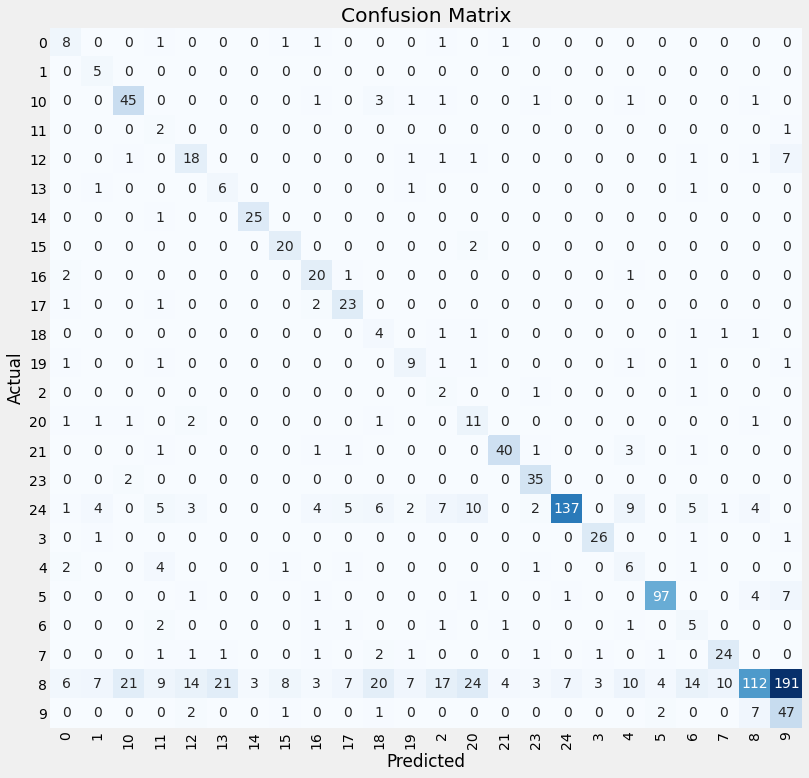

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.3636    0.6154    0.4571        13
           1     0.2632    1.0000    0.4167         5
          10     0.6429    0.8333    0.7258        54
          11     0.0714    0.6667    0.1290         3
          12     0.4390    0.5806    0.5000        31
          13     0.2143    0.6667    0.3243         9
          14     0.8929    0.9615    0.9259        26
          15     0.6452    0.9091    0.7547        22
          16     0.5714    0.8333    0.6780        24
          17     0.5897    0.8519    0.6970        27
          18     0.1081    0.4444    0.1739         9
          19     0.4091    0.5625    0.4737        16
           2     0.0625    0.5000    0.1111         4
          20     0.2157    0.6111    0.3188        18
          21     0.8696    0.8333    0.8511        48
          23     0.7778    0.9459    0.8537        37
          24     0.9448    0.6683 

5.42942494398805e-15

In [86]:
print_code=10
preds=model.predict(test_gen) 
print_info(test_gen, preds, print_code, working_dir, subject) 


### Second Model

In [97]:
model2 = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu',
               input_shape=(256 ,256,  3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dense(5, activation='relu')
  
])


model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 64)      

In [98]:
model2.add(layers.Flatten())
model2.add(layers.Dense(24, activation='softmax'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 64)      

In [99]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
history = model2.fit(train_gen, 
                              steps_per_epoch=train_steps, 
                              epochs=30, 
                              validation_data=valid_gen, 
                              validation_steps=valid_steps)

Epoch 1/30
60/60 [==============================] - 62s 1s/step - loss: 3.9908 - accuracy: 0.0538 - val_loss: 3.0855 - val_accuracy: 0.0515
Epoch 2/30
60/60 [==============================] - 59s 986ms/step - loss: 3.0019 - accuracy: 0.1067 - val_loss: 3.2084 - val_accuracy: 0.0523
Epoch 3/30
60/60 [==============================] - 59s 977ms/step - loss: 2.8404 - accuracy: 0.1667 - val_loss: 2.9780 - val_accuracy: 0.0970
Epoch 4/30
60/60 [==============================] - 59s 976ms/step - loss: 2.5768 - accuracy: 0.2642 - val_loss: 2.8079 - val_accuracy: 0.1909
Epoch 5/30
60/60 [==============================] - 59s 982ms/step - loss: 2.2627 - accuracy: 0.3600 - val_loss: 2.6301 - val_accuracy: 0.2553
Epoch 6/30
60/60 [==============================] - 59s 990ms/step - loss: 1.9781 - accuracy: 0.4867 - val_loss: 2.4302 - val_accuracy: 0.3652
Epoch 7/30
60/60 [==============================] - 59s 977ms/step - loss: 1.7209 - accuracy: 0.5713 - val_loss: 2.3583 - val_accuracy: 0.3871
Ep

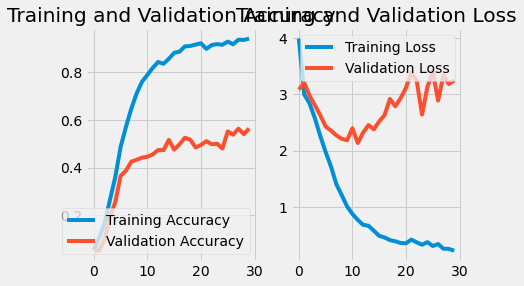

In [106]:
epochs = 30
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


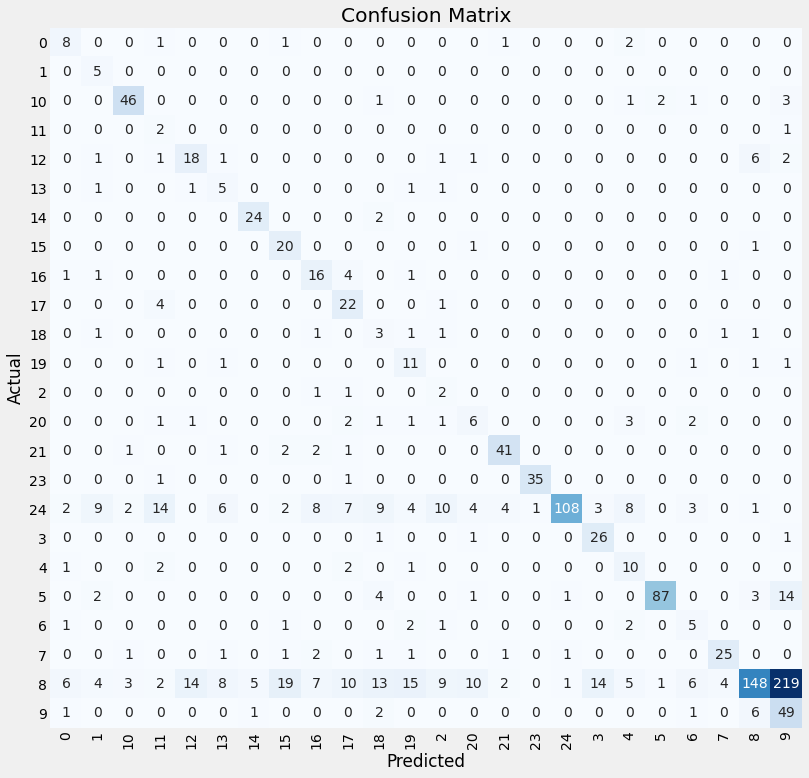

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.4000    0.6154    0.4848        13
           1     0.2083    1.0000    0.3448         5
          10     0.8679    0.8519    0.8598        54
          11     0.0690    0.6667    0.1250         3
          12     0.5294    0.5806    0.5538        31
          13     0.2174    0.5556    0.3125         9
          14     0.8000    0.9231    0.8571        26
          15     0.4348    0.9091    0.5882        22
          16     0.4324    0.6667    0.5246        24
          17     0.4400    0.8148    0.5714        27
          18     0.0811    0.3333    0.1304         9
          19     0.2895    0.6875    0.4074        16
           2     0.0741    0.5000    0.1290         4
          20     0.2500    0.3333    0.2857        18
          21     0.8367    0.8542    0.8454        48
          23     0.9722    0.9459    0.9589        37
          24     0.9730    0.5268 

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [103]:
print_code=10
preds=model2.predict(test_gen) 
print_info(test_gen, preds, print_code, working_dir, subject) 


### Third Model

In [24]:
model3 = Sequential([
  layers.Conv2D(32, (3,3), padding='same', activation='relu',
               input_shape=(256,256,3 )),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),   
  layers.Dropout(0.2),
  
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
  layers.Dense(24, activation='softmax'),
])


model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)      

In [25]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
history = model3.fit(train_gen, 
                              steps_per_epoch=train_steps, 
                              epochs=15, 
                              validation_data=valid_gen, 
                              validation_steps=valid_steps)


Epoch 1/15
60/60 [==============================] - 60s 993ms/step - loss: 52.4538 - accuracy: 0.1813 - val_loss: 2.1978 - val_accuracy: 0.3417
Epoch 2/15
60/60 [==============================] - 59s 988ms/step - loss: 1.5550 - accuracy: 0.5883 - val_loss: 1.2869 - val_accuracy: 0.7212
Epoch 3/15
60/60 [==============================] - 59s 984ms/step - loss: 0.9703 - accuracy: 0.7342 - val_loss: 0.9433 - val_accuracy: 0.7735
Epoch 4/15
60/60 [==============================] - 60s 993ms/step - loss: 0.7292 - accuracy: 0.8008 - val_loss: 0.9167 - val_accuracy: 0.7811
Epoch 5/15
60/60 [==============================] - 59s 987ms/step - loss: 0.5685 - accuracy: 0.8413 - val_loss: 0.7575 - val_accuracy: 0.7955
Epoch 6/15
60/60 [==============================] - 60s 993ms/step - loss: 0.3896 - accuracy: 0.8971 - val_loss: 0.7254 - val_accuracy: 0.8106
Epoch 7/15
60/60 [==============================] - 59s 992ms/step - loss: 0.3936 - accuracy: 0.8825 - val_loss: 0.6623 - val_accuracy: 0.844

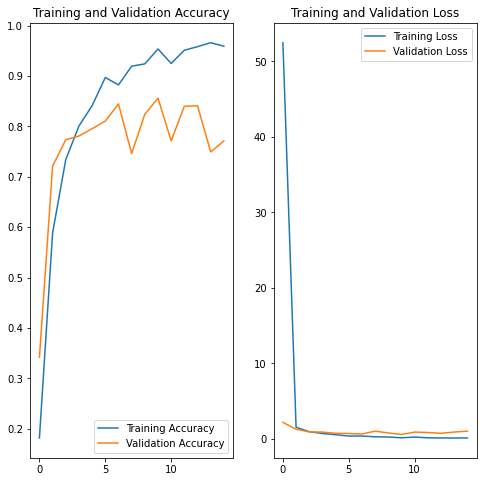

In [35]:
epochs = 15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
test_x, test_y = next(test_gen)

In [37]:
results_test = model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 195ms/step - loss: 5.5437 - accuracy: 0.3846


In [38]:
results_test

[5.5437092781066895, 0.38461539149284363]

#### Classification Report

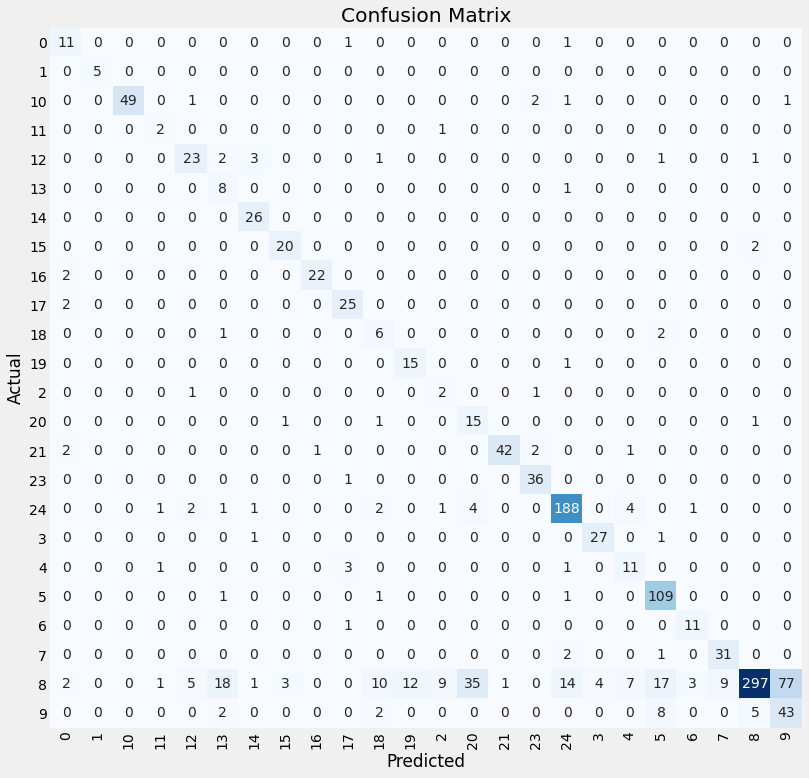

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.5789    0.8462    0.6875        13
           1     1.0000    1.0000    1.0000         5
          10     1.0000    0.9074    0.9515        54
          11     0.4000    0.6667    0.5000         3
          12     0.7188    0.7419    0.7302        31
          13     0.2424    0.8889    0.3810         9
          14     0.8125    1.0000    0.8966        26
          15     0.8333    0.9091    0.8696        22
          16     0.9565    0.9167    0.9362        24
          17     0.8065    0.9259    0.8621        27
          18     0.2609    0.6667    0.3750         9
          19     0.5556    0.9375    0.6977        16
           2     0.1538    0.5000    0.2353         4
          20     0.2778    0.8333    0.4167        18
          21     0.9767    0.8750    0.9231        48
          23     0.8780    0.9730    0.9231        37
          24     0.8952    0.9171 

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [96]:
print_code=10
preds=model3.predict(test_gen) 
acc=print_info( test_gen, preds, print_code, working_dir, subject ) 


## Conclusion

For this project tried 3 different convolutional neural network(CNN) model basic to complex and got best result at the and as 76% accuracy predicted is true. What this mean is model will 24% predict wrong. It looks like not good but not bad too.

## Future Work 

We can work on our model overall shapes to get better result.

We can gather more images about mars to get better data.(which is a little problem in this dataset)

We can try more complex models to get better result.